# Simulation Comparison

In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata


In [ ]:
# define path to interpolated MATLAB simulation data
path = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Leonetti, Davide's files - Project Folder/Data/SimulationImageData/InterpolatedData/homogenious_heat_flux_1.npy"

# load interpolated MATLAB simulation data
sim_data = np.load(path)
print(sim_data.shape)

(301, 307200)


In [ ]:
# define path to raw MATLAB simulation data
path = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Leonetti, Davide's files - Project Folder/Data/SimulationData/homogenious_heat_flux_1.csv"

# load raw MATLAB simulation data
raw_sim_data = pd.read_csv(path)
print("raw simulation data shape: ", raw_sim_data.shape)

raw simulation data shape:  (8481, 305)


In [14]:
# extract coordinates and temperatures
x = raw_sim_data['X'].values  # x-coordinates of nodes
y = raw_sim_data['Y'].values  # y-coordinates of nodes
temperatures = raw_sim_data.iloc[:, 4:].values  # temperature of nodes
num_time_steps = temperatures.shape[1]

print(f"loaded data: {x.shape}, {y.shape}, {temperatures.shape} ")
print("num time steps: ", num_time_steps)

loaded data: (8481,), (8481,), (8481, 301) 
num time steps:  301


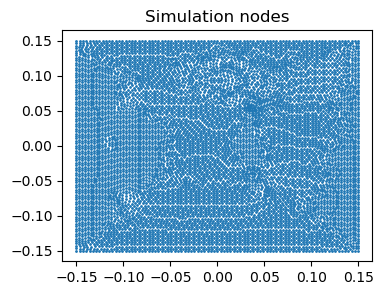

In [15]:
# plot simulation nodes
plt.figure(figsize=(4, 3))
plt.scatter(x, y, s=1) 
plt.title("Simulation nodes")
plt.show()

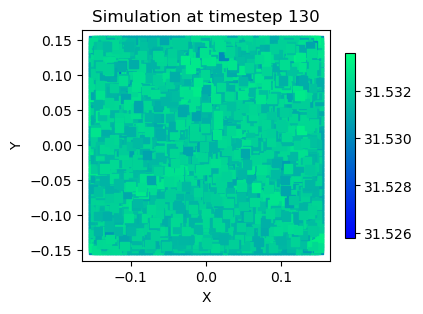

In [ ]:

timestep = 100 # choose specific timeframe
temp_at_timestep = temperatures[:, timestep]  # Get temperature values for the chosen frame

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Simulation at timestep {timestep}")
plt.show()

In [19]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 640),
    np.linspace(y.min(), y.max(), 480)
)

# initialize pixel grid for temperatures
grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], temperatures.shape[1]))

# interpolate temperatures for each time step
for i in range(temperatures.shape[1]):
    grid_temperatures [:,:,i] = griddata(
    points=(x, y), # input coordinates
    values=temperatures[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
    )

print("interpolated temperatures: ", grid_temperatures.shape)

interpolated temperatures:  (480, 640, 301)


In [20]:
# transpose to make time axis the first dimension
grid_temperatures_transposed = np.transpose(grid_temperatures, (2, 0, 1)) 

# flatten the grid to have shape (time steps, 307200)
flattened_temperatures = grid_temperatures_transposed.reshape(num_time_steps, -1)

print("final shape: ", flattened_temperatures.shape)  # should be (num time steps, 307200)

final shape:  (301, 307200)


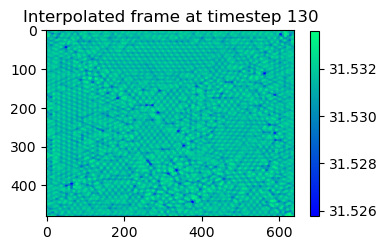

In [21]:
# plot interpolated frame
frame = flattened_temperatures[timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {timestep}")
plt.show()

## Ansys Interpolation & Comparison to MATLAB

In [ ]:
# load experimental data
data_path = "/Users/kelseypenners/Library/CloudStorage/OneDrive-TUEindhoven/Li, Muyao's files - 5ARIP10 shared data/Experimental data/resin plates"
files = os.listdir(data_path)

npy_path = os.path.join(data_path, files[0])
experimental_data = np.load(npy_path)

In [62]:
# load ansys simulation data
path = "../SimulationModel/simulation results.csv"
ansys_data = pd.read_csv(path)
matlab_data = raw_sim_data

In [63]:
print("composite plate npy shape: ", experimental_data.shape)
print("ansys simulation data shape: ", ansys_data.shape)
print("MATLAB simulation data shape: ", matlab_data.shape)

composite plate npy shape:  (1324, 307200)
ansys simulation data shape:  (7825, 34)
MATLAB simulation data shape:  (8481, 305)


### Ansys Data Interpolation

In [25]:
# extract coordinates and temperatures
x_ansys = ansys_data['Xloc'].values  # x-coordinates of nodes
y_ansys= ansys_data['Yloc'].values  # y-coordinates of nodes
temperatures_ansys = ansys_data.iloc[:, :-3].values  # temperature of nodes
num_time_steps = temperatures_ansys.shape[1]

print(f"loaded ansys data: {x_ansys.shape}, {y_ansys.shape}, {temperatures_ansys.shape} ")
print(f"loaded matlab data: {x.shape}, {y.shape}, {temperatures.shape}")


loaded ansys data: (7825,), (7825,), (7825, 31) 
loaded matlab data: (8481,), (8481,), (8481, 301)


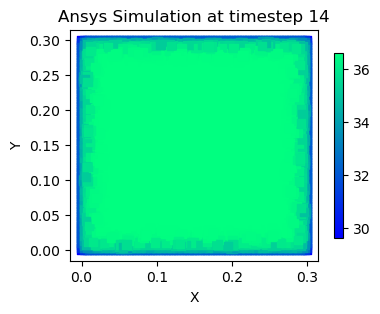

In [27]:
 # choose specific timeframe
ansys_timestep = 14
temp_at_timestep = temperatures_ansys[:, ansys_timestep]  # Get temperature values for the chosen frame

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x_ansys, y_ansys, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Ansys Simulation at timestep {ansys_timestep}")
plt.show()

In [28]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x_ansys.min(), x_ansys.max(), 640),
    np.linspace(y_ansys.min(), y_ansys.max(), 480)
)

# initialize pixel grid for temperatures
ansys_grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], num_time_steps))

# interpolate temperatures for each time step
for i in range(num_time_steps):
    ansys_grid_temperatures [:,:,i] = griddata(
    points=(x_ansys, y_ansys), # input coordinates
    values=temperatures_ansys[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
)

print("interpolated temperatures: ", ansys_grid_temperatures.shape)

interpolated temperatures:  (480, 640, 31)


In [29]:
# transpose to make time axis the first dimension
ansys_grid_transposed = np.transpose(ansys_grid_temperatures, (2, 0, 1))

# flatten the grid to have shape (time steps, 307200)
ansys_flattened_temperatures = ansys_grid_transposed.reshape(num_time_steps, -1)  
print("final shape: ", ansys_flattened_temperatures.shape) # should be (num time steps, 307200)


final shape:  (31, 307200)


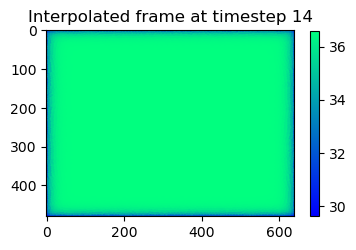

In [30]:
# plot interpolated frame
ansys_frame = ansys_flattened_temperatures[ansys_timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(ansys_frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {ansys_timestep}")
plt.show()

### Simulations and Experimental Data Comparison

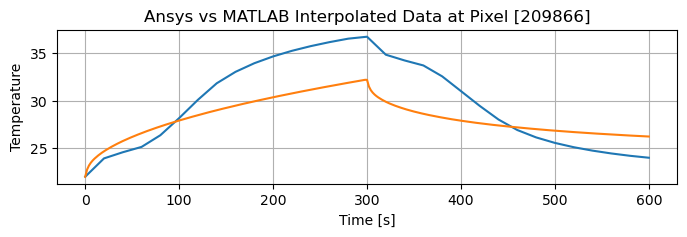

In [103]:
pixel =  np.random.choice(307200, 1)
p_ansys = ansys_flattened_temperatures[:,pixel] 
t_ansys = np.linspace(0, 600, 31) 
p_matlab = flattened_temperatures[:,pixel]
t_matlab = np.linspace(0, 600, 301)

plt.figure(figsize=(8,2))
plt.plot(t_ansys, p_ansys)
plt.plot(t_matlab, p_matlab)
plt.xlabel('Time [s]')
plt.ylabel('Temperature')
plt.grid('on')
plt.title(f"Ansys vs MATLAB Interpolated Data at Pixel {pixel}")
plt.show()


In [ ]:

def plot_pixel_temp(pixel_id, temps, timesteps, labels):
    plt.figure(figsize=(8,2))
    for i in range(len(temps)):
        temperatures = temps[i]
        plt.plot(timesteps[i], temperatures[:,pixel_id], label=labels[i])
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature')
    plt.grid('on')
    plt.title(f"Temperature at pixel {pixel_id}")
    plt.show()


Pixel Comparison: 


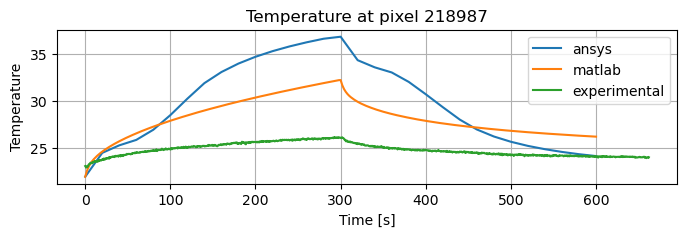

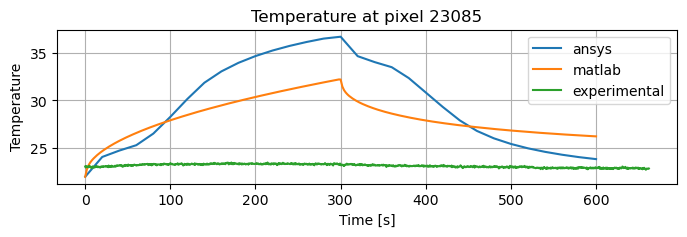

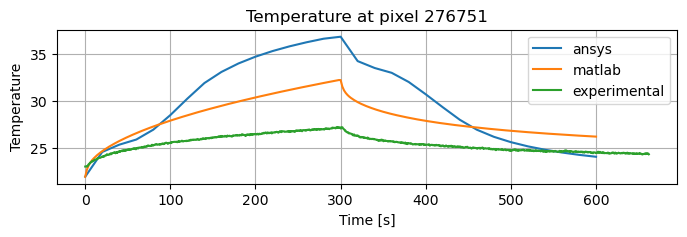

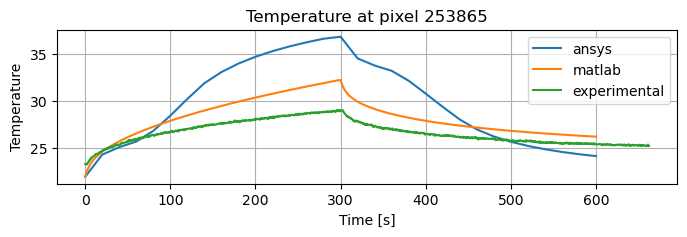

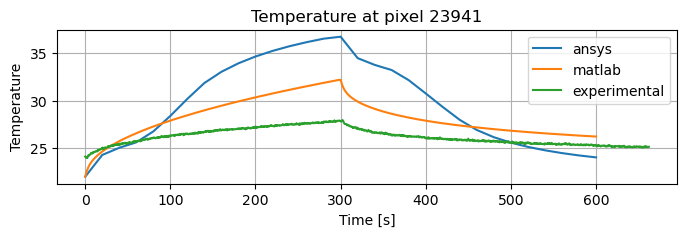

In [107]:
# plot various pixel temperatures over time
pixels = np.random.choice(307200, 5)
temps = [ansys_flattened_temperatures, sim_data, experimental_data]
timesteps = [np.linspace(0, 600, ansys_flattened_temperatures.shape[0]),
             np.linspace(0, 600, sim_data.shape[0]),
             np.linspace(0, experimental_data.shape[0]*0.5, experimental_data.shape[0])]
labels = ["ansys", "matlab", "experimental"]
print("Pixel Comparison: ")
for pixel in pixels:
    plot_pixel_temp(pixel, temps, timesteps, labels)


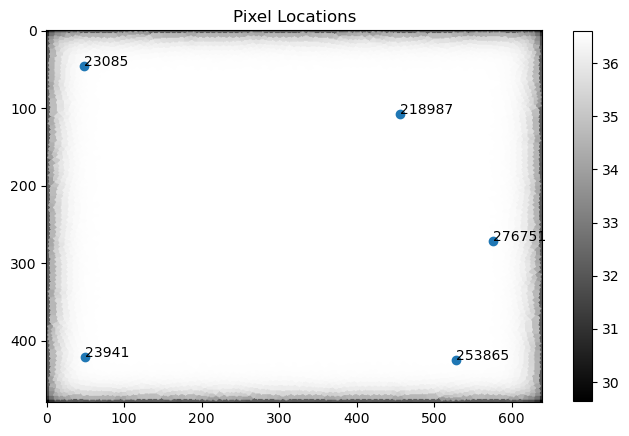

In [109]:
# plot pixel locations on a frame
frame = sim_data[timestep, :].reshape((480, 640))
#pixels = [47662, 67512, 97594, 123790, 132210, 208410, 297585, 302573]
x = []
y = []
for pixel in pixels:
    row, col = divmod(pixel, 480)
    x.append(row)
    y.append(col)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label=pixels)
plt.imshow(ansys_frame, cmap='grey')
for i, txt in enumerate(pixels):
    plt.annotate(txt, (x[i], y[i]))
plt.colorbar(shrink=0.8)
plt.title(f"Pixel Locations")
plt.show()